In [48]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For splitting the data and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import resample

# For model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

Importing the dataset

In [49]:
# Load the liver patient dataset
dataset = pd.read_csv('/content/Liver Patient Dataset (LPD)_train.csv',encoding='latin1')

# Display the dataset
dataset


,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


Pre Processing the dataset

In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [51]:
dataset.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [52]:
# Strip leading and trailing spaces from column names
dataset.columns = dataset.columns.str.strip()

# Map 'Male' to 1 and 'Female' to 0 in the 'Gender of the patient' column
dataset['Gender of the patient'] = dataset['Gender of the patient'].map({'Male': 1, 'Female': 0})

# Map the 'Result' column to 0 for no liver disease and 1 for having liver disease
dataset['Result'] = dataset['Result'].map({1: 1, 2: 0})

# Display the updated dataset to verify changes
dataset.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,1.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,1.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,1.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,1.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [53]:
dataset

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,1.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,1.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,1.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,1.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,1.0,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,1.0,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,1.0,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,0.0,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


In [54]:
# Display value counts for all columns
for column in dataset.columns:
    print(f"Value counts for {column}:")
    print(dataset[column].value_counts(dropna=False))  # Includes NaN values
    print("\n")


Value counts for Age of the patient:
Age of the patient
45.0    1467
50.0    1308
42.0    1285
60.0    1277
48.0    1106
        ... 
77.0      10
80.0       9
NaN        2
89.0       2
83.0       1
Name: count, Length: 78, dtype: int64


Value counts for Gender of the patient:
Gender of the patient
1.0    21986
0.0     7803
NaN      902
Name: count, dtype: int64


Value counts for Total Bilirubin:
Total Bilirubin
0.8     4588
0.7     3929
0.9     2873
0.6     2384
1.0     1519
        ... 
75.0      47
16.4      47
8.7       46
11.0      45
14.5      43
Name: count, Length: 114, dtype: int64


Value counts for Direct Bilirubin:
Direct Bilirubin
0.2     9808
0.1     3259
0.3     2689
0.8     1102
0.5     1079
        ... 
8.9       48
4.6       48
11.4      48
6.4       46
12.8      45
Name: count, Length: 81, dtype: int64


Value counts for Alkphos Alkaline Phosphotase:
Alkphos Alkaline Phosphotase
NaN      796
215.0    573
298.0    571
198.0    561
158.0    497
        ... 
271.0    

In [55]:
# Display the shape of the dataset
print("Shape of the dataset:", dataset.shape)

Shape of the dataset: (30691, 11)


In [56]:
# Separate numeric and categorical columns
df_num = dataset.select_dtypes(include=[np.number])  # Numeric columns
df_cat = dataset.select_dtypes(include=[object])     # Categorical columns

# Extract column names (excluding the last column, if necessary)
num_cols = df_num.columns.values[:-1]  # Exclude the last column if needed
cat_cols = df_cat.columns.values

# Display numeric and categorical column names
print("\nNumeric columns:", num_cols)
print("\nCategorical columns:", cat_cols)


Numeric columns: ['Age of the patient' 'Gender of the patient' 'Total Bilirubin'
 'Direct Bilirubin' 'Alkphos Alkaline Phosphotase'
 'Sgpt Alamine Aminotransferase' 'Sgot Aspartate Aminotransferase'
 'Total Protiens' 'ALB Albumin' 'A/G Ratio Albumin and Globulin Ratio']

Categorical columns: []


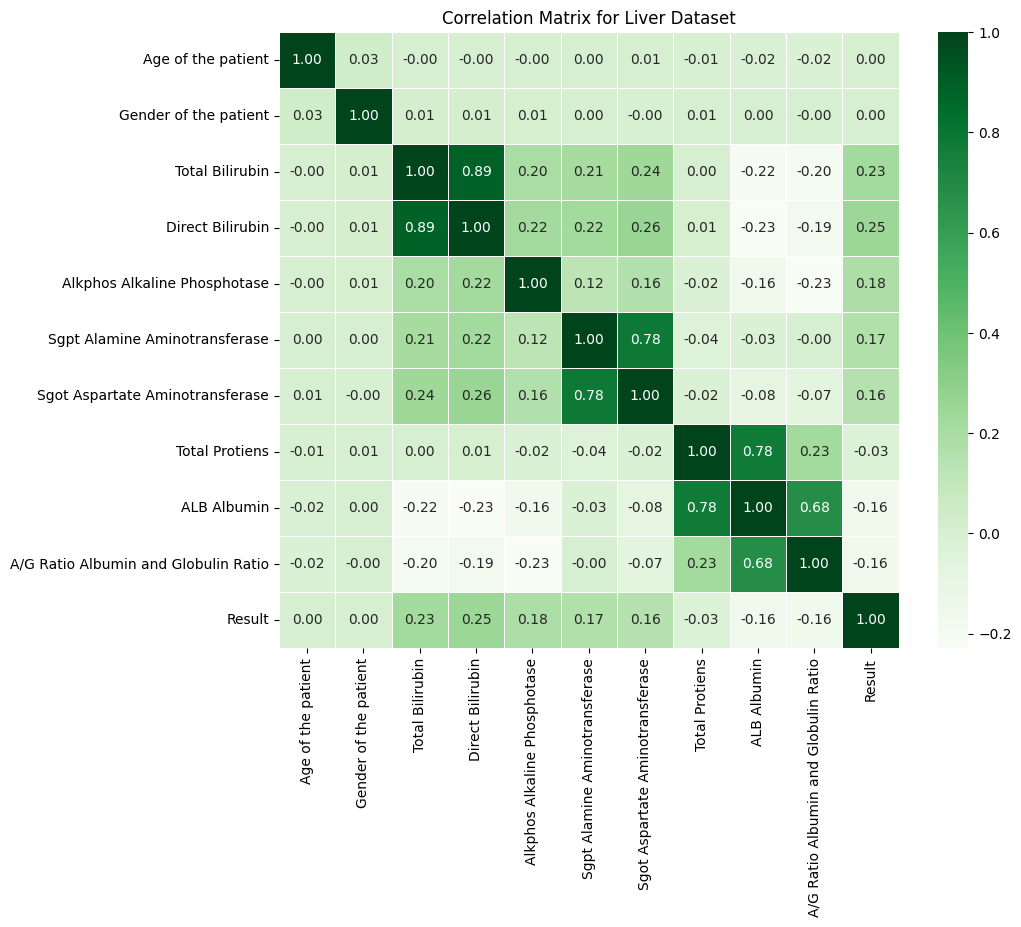

In [57]:
# Calculate the correlation matrix
corr_matrix = dataset.corr()

# Plot the correlation matrix as a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)  # Use "Greens" for the color map
plt.title("Correlation Matrix for Liver Dataset")
plt.show()

In [58]:
# Check for missing values
print("Missing values before handling:")
print(dataset.isnull().sum())

Missing values before handling:
Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
Alkphos Alkaline Phosphotase            796
Sgpt Alamine Aminotransferase           538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
ALB Albumin                             494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64


In [59]:
# Fill missing values with the mean for numeric columns
numeric_columns = dataset.select_dtypes(include=[np.number]).columns
dataset[numeric_columns] = dataset[numeric_columns].fillna(dataset[numeric_columns].mean())

In [60]:
print("\nMissing values after handling:")
print(dataset.isnull().sum())


Missing values after handling:
Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
Alkphos Alkaline Phosphotase            0
Sgpt Alamine Aminotransferase           0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
ALB Albumin                             0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64


Feature Selection

In [61]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = dataset.drop(columns=['Result'])  # Drop the target column
y = dataset['Result']                 # Target column

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:
# DataFrame
X = pd.DataFrame(X_scaled, columns=X.columns)

print("Feature scaling completed. Scaled features:")
print(X.head())


Feature scaling completed. Scaled features:
   Age of the patient  Gender of the patient  Total Bilirubin  \
0            1.307413              -1.703805        -0.431460   
1            1.119681               0.604693         1.216618   
2            1.119681               0.604693         0.634943   
3            0.869372               0.604693        -0.382987   
4            1.745453               0.604693         0.085584   

   Direct Bilirubin  Alkphos Alkaline Phosphotase  \
0         -0.502266                     -0.433588   
1          1.397004                      1.741248   
2          0.904601                      0.853473   
3         -0.396751                     -0.454827   
4          0.165996                     -0.399607   

   Sgpt Alamine Aminotransferase  Sgot Aspartate Aminotransferase  \
0                      -0.362713                        -0.335349   
1                      -0.096862                        -0.041152   
2                      -0.119016       

In [63]:
print("Shape of the dataset:", dataset.shape)

Shape of the dataset: (30691, 11)


Splitting the dataset for training and tetsting

In [64]:
from sklearn.model_selection import train_test_split

# Use a 75:25 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Display the shapes of the splits
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")


Training features shape: (24552, 10)
Testing features shape: (6139, 10)
Training labels shape: (24552,)
Testing labels shape: (6139,)


Logistic regression

In [65]:
import numpy as np

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function (log loss)
def compute_cost(X, y, weights):
    m = len(y)
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

# Perform gradient descent to optimize weights
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        # Calculate predictions
        z = np.dot(X, weights)
        predictions = sigmoid(z)

        # Compute the gradient
        gradient = (1/m) * np.dot(X.T, (predictions - y))

        # Update weights
        weights -= learning_rate * gradient

        # Store the cost
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

    return weights, cost_history

# Train Logistic Regression
def train_logistic_regression(X_train, y_train, learning_rate=0.01, iterations=1000):
    # Add a bias column to the input data
    X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]

    # Initialize weights
    weights = np.zeros(X_train.shape[1])

    # Perform gradient descent
    weights, cost_history = gradient_descent(X_train, y_train, weights, learning_rate, iterations)

    return weights, cost_history

# Predict function
def predict(X, weights):
    # Add a bias column to the input data
    X = np.c_[np.ones((X.shape[0], 1)), X]
    probabilities = sigmoid(np.dot(X, weights))
    return [1 if prob >= 0.5 else 0 for prob in probabilities]

# Prepare data for training
X_train_np = X_train.values  # Convert to NumPy array
y_train_np = y_train.values  # Convert to NumPy array

# Train the model
weights, cost_history = train_logistic_regression(X_train_np, y_train_np, learning_rate=0.01, iterations=1000)

# Make predictions on the test set
X_test_np = X_test.values  # Convert to NumPy array
y_pred = predict(X_test_np, weights)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[  99 1611]
 [ 111 4318]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.06      0.10      1710
           1       0.73      0.97      0.83      4429

    accuracy                           0.72      6139
   macro avg       0.60      0.52      0.47      6139
weighted avg       0.66      0.72      0.63      6139


Accuracy Score:
0.7194982896237172


# Support Vector Machine (SVM)


SVM with Linear Kernel
Accuracy: 0.7215
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1710
           1       0.72      1.00      0.84      4429

    accuracy                           0.72      6139
   macro avg       0.36      0.50      0.42      6139
weighted avg       0.52      0.72      0.60      6139



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


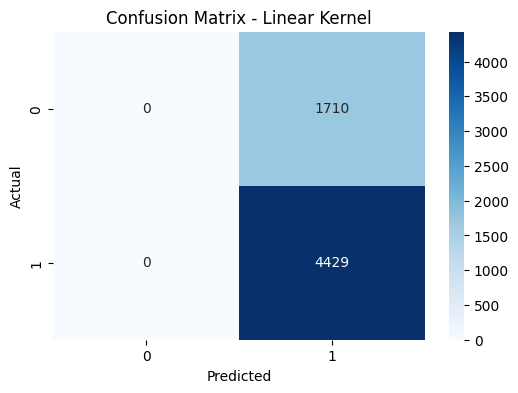


SVM with Rbf Kernel
Accuracy: 0.7337
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.09      0.17      1710
           1       0.74      0.98      0.84      4429

    accuracy                           0.73      6139
   macro avg       0.69      0.54      0.50      6139
weighted avg       0.71      0.73      0.65      6139



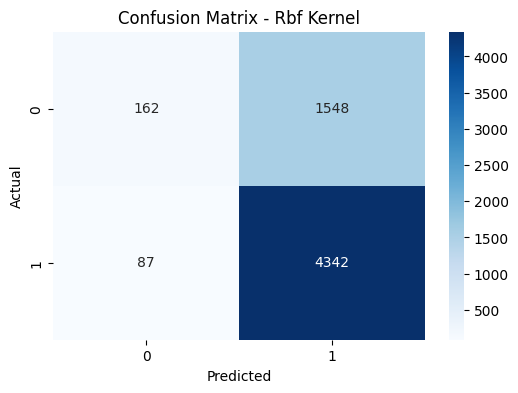


SVM with Poly Kernel
Accuracy: 0.7309
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.04      0.07      1710
           1       0.73      1.00      0.84      4429

    accuracy                           0.73      6139
   macro avg       0.81      0.52      0.46      6139
weighted avg       0.77      0.73      0.63      6139



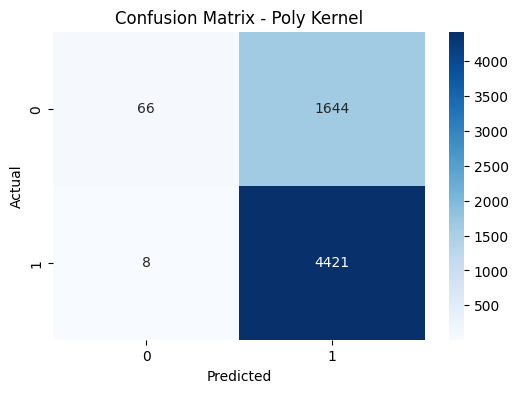

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_svm(X_train, X_test, y_train, y_test, kernel_type):
    print(f"\nSVM with {kernel_type.capitalize()} Kernel")

    # Initialize the SVM model
    svm_model = SVC(kernel=kernel_type, C=1, random_state=42)

    # Train the model
    svm_model.fit(X_train, y_train)

    # Make predictions
    y_pred = svm_model.predict(X_test)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix - {kernel_type.capitalize()} Kernel")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Decision Boundary
    if X_train.shape[1] == 2:
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
        Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k", cmap="coolwarm", marker="o")
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k", cmap="viridis", marker="x")
        plt.title(f"Decision Boundary - {kernel_type.capitalize()} Kernel")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()

# Evaluate SVM with linear, RBF, and polynomial kernels
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    evaluate_svm(X_train, X_test, y_train, y_test, kernel_type=kernel)


 Random Forest and Decision tree

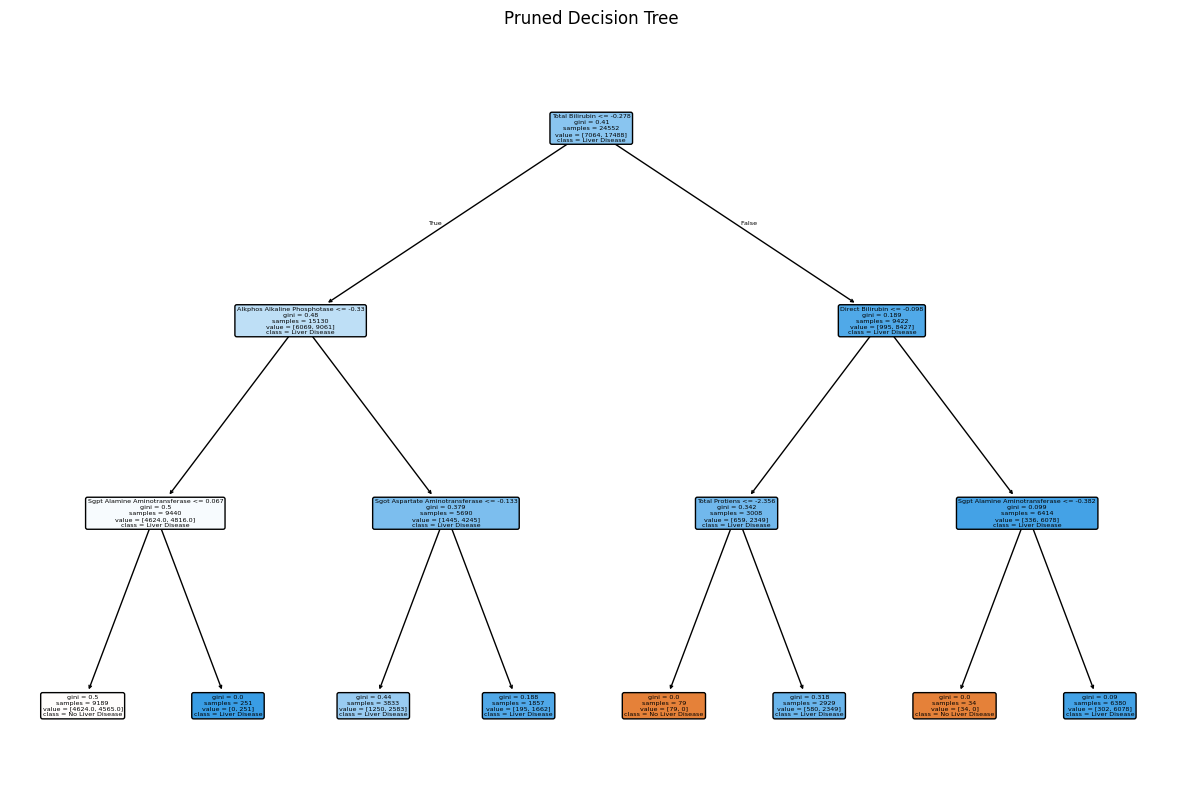

In [68]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Extract the first decision tree from the random forest
original_tree = random_forest.estimators_[0]

# Prune the decision tree by setting a maximum depth
pruned_tree = DecisionTreeClassifier(max_depth=3, random_state=42)  # Set max_depth to prune
pruned_tree.fit(X_train, y_train)  # Refit the tree to the training data

# Visualize the pruned tree
plt.figure(figsize=(15, 10))
plot_tree(
    pruned_tree,
    feature_names=X_train.columns,
    class_names=['No Liver Disease', 'Liver Disease'],
    filled=True,
    rounded=True
)
plt.title("Pruned Decision Tree")
plt.show()


<ipython-input-69-d48440a514aa>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


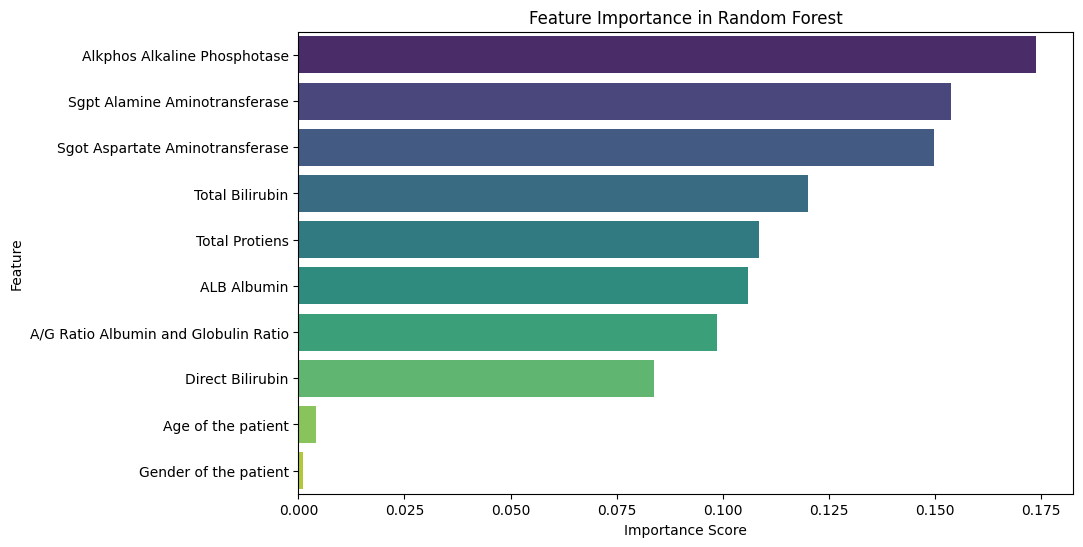

In [69]:
import pandas as pd
import seaborn as sns

# Get feature importances from the random forest
feature_importances = random_forest.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


# KNN

In [70]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Step 1: Randomly sample 3000 rows from the dataset
sampled_dataset = dataset.sample(n=3000, random_state=42)  # Set random_state for reproducibility

# Step 2: Separate features and target
X_sampled = sampled_dataset.drop(columns=['Result'])  # Replace 'Result' with your target column name
y_sampled = sampled_dataset['Result']

# Step 3: Split into train and test sets
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(
    X_sampled, y_sampled, test_size=0.2, random_state=42
)

# Step 4: knn Algorithm
def knn(X_train, y_train, X_test, k=5):
    y_pred = []  # List to store predictions
    for test_point in X_test:
        # Compute distances from test point to all training points
        distances = [np.linalg.norm(test_point - train_point) for train_point in X_train]
        # Get indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:k]
        # Get the labels of the k nearest neighbors
        k_labels = [y_train[i] for i in k_indices]
        # Predict the majority class
        majority_label = max(set(k_labels), key=k_labels.count)
        y_pred.append(majority_label)
    return y_pred

# Step 5: Convert data to NumPy arrays
X_train_np = X_train_sampled.values
X_test_np = X_test_sampled.values
y_train_np = y_train_sampled.values

# Step 6: Train and test KNN
k = 5  # Number of neighbors
y_pred_knn = knn(X_train_np, y_train_np, X_test_np, k=k)

# Step 7: Evaluate the KNN model
print("Accuracy:", accuracy_score(y_test_sampled, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test_sampled, y_pred_knn))


Accuracy: 0.7983333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.58      0.61       160
           1       0.85      0.88      0.86       440

    accuracy                           0.80       600
   macro avg       0.74      0.73      0.74       600
weighted avg       0.79      0.80      0.80       600



Naive Bayes

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Split the data (if not already split)
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# Step 2: Initialize and train the Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set using Gaussian Naive Bayes
y_pred_gnb = gnb_model.predict(X_test)

# Step 4: Evaluate the Gaussian Naive Bayes model
print("Gaussian Naive Bayes - Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("\nGaussian Naive Bayes - Classification Report:")
print(classification_report(y_test, y_pred_gnb))

# Step 5: Initialize and train the Bernoulli Naive Bayes model
bnb_model = BernoulliNB()
bnb_model.fit(X_train, y_train)

# Step 6: Make predictions on the test set using Bernoulli Naive Bayes
y_pred_bnb = bnb_model.predict(X_test)

# Step 7: Evaluate the Bernoulli Naive Bayes model
print("Bernoulli Naive Bayes - Accuracy:", accuracy_score(y_test, y_pred_bnb))
print("\nBernoulli Naive Bayes - Classification Report:")
print(classification_report(y_test, y_pred_bnb))


Gaussian Naive Bayes - Accuracy: 0.555

Gaussian Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.97      0.54       160
           1       0.98      0.40      0.57       440

    accuracy                           0.56       600
   macro avg       0.68      0.69      0.55       600
weighted avg       0.82      0.56      0.56       600

Bernoulli Naive Bayes - Accuracy: 0.7333333333333333

Bernoulli Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       160
           1       0.73      1.00      0.85       440

    accuracy                           0.73       600
   macro avg       0.37      0.50      0.42       600
weighted avg       0.54      0.73      0.62       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ExtraGradient Boosting XGB

In [72]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Step 2: Train the model
xgb_model.fit(X_train_sampled, y_train_sampled)

# Step 3: Make predictions
y_pred_xgb = xgb_model.predict(X_test_sampled)

# Step 4: Evaluate the XGBoost model
print("XGBoost - Accuracy:", accuracy_score(y_test_sampled, y_pred_xgb))
print("\nXGBoost - Classification Report:")
print(classification_report(y_test_sampled, y_pred_xgb))


XGBoost - Accuracy: 0.9883333333333333

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       160
           1       0.99      0.99      0.99       440

    accuracy                           0.99       600
   macro avg       0.99      0.98      0.99       600
weighted avg       0.99      0.99      0.99       600



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:41:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
